## TRIGGER WARNING: the dataset mentions rape, murder and assault

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Chapter 10 Lab 1: Principal component analysis

In this lab, we perform PCA on the USArrests data set.  The rows of the data set contain the 50 states, in
alphabetical order.

In [2]:
df = pd.read_csv('Data/USArrests.csv', index_col=0)
df.Assault = df.Assault.astype('float64')
df.UrbanPop = df.UrbanPop.astype('float64')
df.head()


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6


We first briefly examine the data. We notice that the variables have vastly
different means.

In [3]:
display("Mean",np.mean(df))
display("Variance",np.var(df))

'Mean'

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

'Variance'

Murder        18.591056
Assault     6806.262400
UrbanPop     205.328400
Rape          85.974576
dtype: float64

Not surprisingly, the variables also have vastly different variances: the
UrbanPop variable measures the percentage of the population in each state
living in an urban area, which is not a comparable number to the number of rapes in each state per 100,000 individuals. If we failed to scale the
variables before performing PCA, then most of the principal components
that we observed would be driven by the Assault variable, since it has by
far the largest mean and variance. Thus, it is important to standardize the
variables to have mean zero and standard deviation one before performing
PCA.

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
display("Mean", np.mean(scaled_df))
display("Variance",np.var(scaled_df))


'Mean'

Murder     -7.105427e-17
Assault     1.387779e-16
UrbanPop   -4.396483e-16
Rape        8.593126e-16
dtype: float64

'Variance'

Murder      1.0
Assault     1.0
UrbanPop    1.0
Rape        1.0
dtype: float64

In [5]:
pca = PCA()
model = pca.fit(scaled_df)
loadings = pd.DataFrame(model.components_.T, index=df.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
display(loadings)


,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


We see that there are four distinct principal components. This is to be
expected because there are in general min(n − 1, p) informative principal
components in a data set with n observations and p variables.

We can plot the first two principal components with the `pca` package:

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


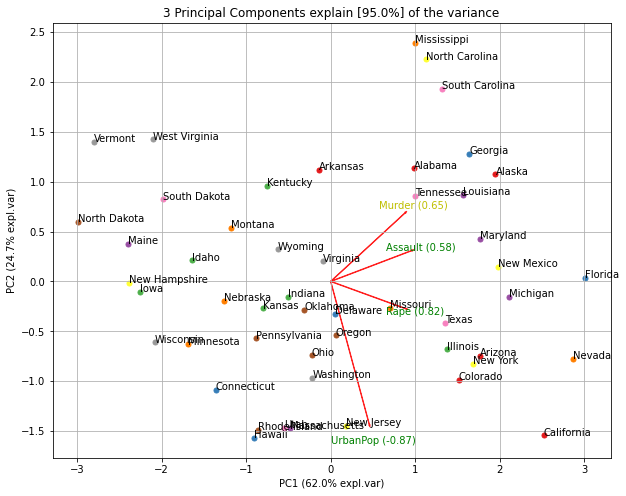

In [6]:
from pca import pca

model = pca()
results = model.fit_transform(scaled_df)
fig, ax = model.biplot(legend = False)

We see that the first principal component explains 62.0 % of the variance
in the data, the next principal component explains 24.7 % of the variance,
and so forth. We can plot the PVE explained by each component, as well
as the cumulative PVE, as follows:

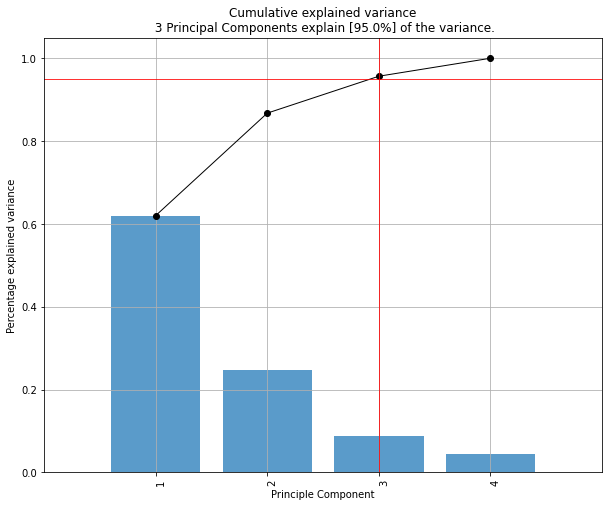

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = model.plot()